# Hacking fields...

Read a field, cut the smallest wavelength in spectral space, add some noise... or any other change !

In [1]:
%matplotlib inline
import os
import epygram
epygram.init_env()
workdir = epygram.config.userlocaldir + '/notebooks_data'
os.chdir(workdir)
import numpy

In [2]:
r = epygram.formats.resource('advanced_examples/ICMSHAROM+0001', 'r')
r_out = epygram.formats.resource('advanced_examples/ICMSHAROM+0001_bis', 'a')  # 'a' == r/w

In [3]:
orog = r.readfield('SPECSURFGEOPOTEN')
orog.spectral

True

In [4]:
t2m = r.readfield('SURFTEMPERATURE')
t2m.spectral

False

(<matplotlib.figure.Figure at 0x7f5c0179fb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c01770e90>)

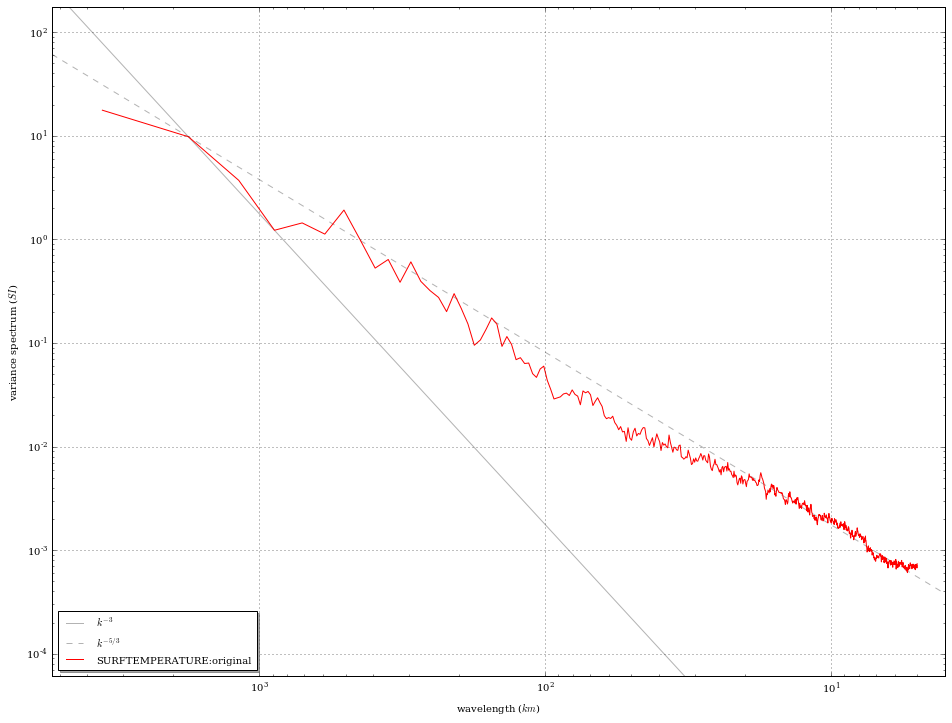

In [5]:
t2m_spectrum1 = t2m.dctspectrum(subzone='CI')  # compute its DCT spectrum
t2m_spectrum1.name = 'SURFTEMPERATURE:original'
t2m_spectrum1.plotspectrum()

Now let's cut the smallest wavelengths

In [6]:
print(orog.spectral_geometry)

SpectralGeometry containing:
    truncation: 
        in_X: 374
        in_Y: 359
        shape: elliptic
    space: bi-fourier


In [7]:
# let's make a modified, truncated geometry
truncated_geom = orog.spectral_geometry.deepcopy()
truncated_geom.truncation['in_X'] = 320
truncated_geom.truncation['in_Y'] = 300

In [8]:
# spectral round-trip on the truncated geometry
t2m.gp2sp(truncated_geom)
t2m.sp2gp()

In [9]:
t2m_spectrum2 = t2m.dctspectrum(subzone='CI')  # compute the new spectrum
t2m_spectrum2.name = 'SURFTEMPERATURE:truncated'

And finally let's get a 3rd field, truncated, with some noise added on...

In [10]:
t2m.geometry.dimensions

{u'X': 750,
 u'X_CIoffset': 0,
 u'X_CIzone': 739,
 u'X_Czone': 723,
 u'X_Iwidth': 8,
 u'Y': 720,
 u'Y_CIoffset': 0,
 u'Y_CIzone': 709,
 u'Y_Czone': 693,
 u'Y_Iwidth': 8}

In [11]:
noise = numpy.random.normal(0, size=(t2m.geometry.dimensions['Y_CIzone'],
                                     t2m.geometry.dimensions['X_CIzone']))

In [12]:
fdata = t2m.getdata()
fdata[:t2m.geometry.dimensions['Y_CIzone'],
      :t2m.geometry.dimensions['X_CIzone']] += noise

In [13]:
t2m.setdata(fdata)  # update the field data

In [14]:
t2m_spectrum3 = t2m.dctspectrum(subzone='CI')  # compute the new spectrum
t2m_spectrum3.name = 'SURFTEMPERATURE:truncated+noise'

(<matplotlib.figure.Figure at 0x7f5c006f92d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c006e9cd0>)

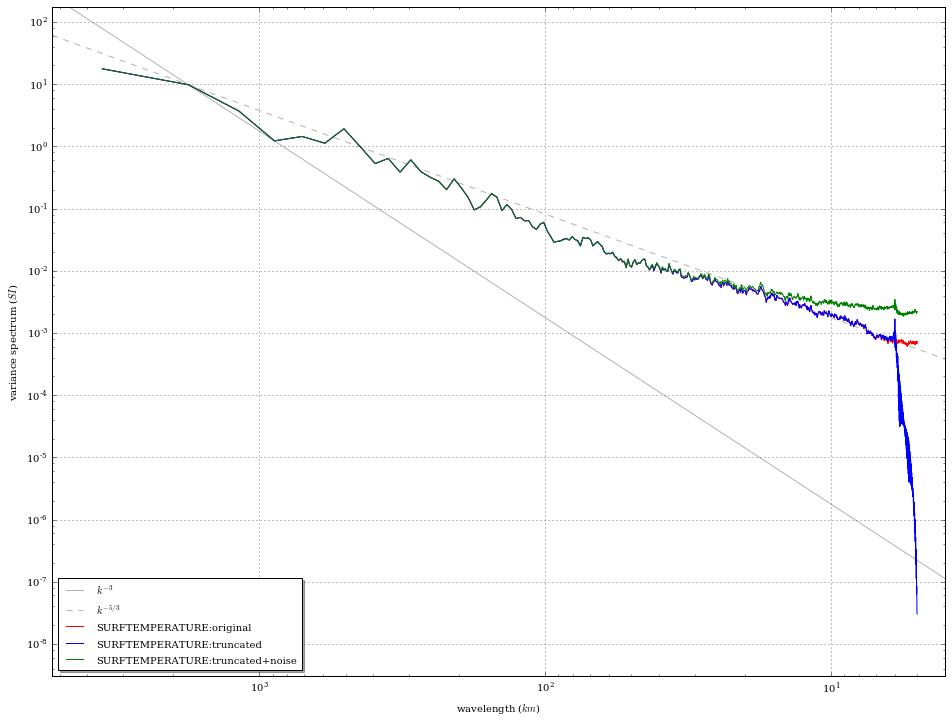

In [15]:
# and now plot the 3 spectra
epygram.spectra.plotspectra([t2m_spectrum1, t2m_spectrum2, t2m_spectrum3])

In [16]:
r_out.writefield(t2m)  # and write back the field to the file

# [2017/08/21-17:13:17][epygram.formats.FA][writefield:1009][INFO]: there already is a field with the same name in this FA: overwrite.
